In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
from IPython import display as ICD
from nba_api.stats.endpoints import leaguedashplayerstats, leaguedashteamclutch, leaguegamelog, boxscoreplayertrackv2, playercareerstats, teamplayerdashboard, leaguestandings
from nba_api.stats.static import players, teams

import numpy as np
import statsmodels.api as sm

import time

import warnings
warnings.filterwarnings("ignore")

In [2]:
league_standings = leaguestandings.LeagueStandings(season="2018-19").get_data_frames()[0]
league_standings[['TeamName','PointsPG','OppPointsPG']]

,TeamName,PointsPG,OppPointsPG
0,Bucks,118.1,109.3
1,Warriors,117.7,111.2
2,Nuggets,110.7,106.7
3,Raptors,114.4,108.4
4,Trail Blazers,114.7,110.5
5,76ers,115.2,112.5
6,Celtics,112.4,108.0
7,Rockets,113.9,109.1
8,Pacers,108.0,104.7
9,Jazz,111.7,106.5


In [3]:
leaguedashteamclutch.LeagueDashTeamClutch(season_type_all_star='Regular Season', season='2019-20').get_data_frames()[0]

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS
0,1610612737,Atlanta Hawks,34,13,21,0.382,128.953333,83,228,0.364,23,92,0.250,71,92,0.772,36,90,126,36,35.0,19,13,27,73,60,260,-30.0,17,21,23,24,18,23,15,29,23,14,28,18,19,20,6,17,12,28,18,9,19,30,13,24,22,22,6,Atlanta Hawks
1,1610612738,Boston Celtics,41,23,18,0.561,140.978333,116,261,0.444,39,105,0.371,93,117,0.795,34,104,138,70,40.0,17,16,15,91,85,364,29.0,5,6,14,12,12,5,7,8,2,6,8,10,12,12,9,7,8,2,22,15,12,15,25,11,5,10,6,Boston Celtics
2,1610612751,Brooklyn Nets,39,20,19,0.513,169.935000,132,307,0.430,34,114,0.298,110,142,0.775,48,119,167,65,45.0,15,17,24,95,96,408,30.0,9,9,17,13,4,4,2,12,10,4,20,4,3,18,2,3,1,4,28,20,8,29,27,6,3,9,6,Brooklyn Nets
3,1610612766,Charlotte Hornets,34,17,17,0.500,148.435000,112,226,0.496,43,101,0.426,93,120,0.775,29,95,124,60,40.0,15,18,8,76,89,360,32.0,17,16,12,14,8,6,16,2,1,7,1,10,10,17,17,10,13,5,22,20,5,4,16,8,7,8,6,Charlotte Hornets
4,1610612741,Chicago Bulls,38,13,25,0.342,119.120000,76,192,0.396,33,92,0.359,71,83,0.855,25,64,89,43,31.0,16,9,18,80,64,256,-65.0,11,21,28,26,22,26,25,23,12,14,10,18,23,4,27,27,28,23,12,19,27,22,19,20,23,28,6,Chicago Bulls
5,1610612739,Cleveland Cavaliers,29,13,16,0.448,132.205000,94,230,0.409,31,77,0.403,65,83,0.783,42,94,136,51,41.0,9,18,19,60,64,284,-9.0,28,21,10,17,15,16,14,21,17,24,3,25,23,15,4,13,9,15,25,29,5,24,4,20,19,15,6,Cleveland Cavaliers
6,1610612742,Dallas Mavericks,41,17,24,0.415,163.216667,109,285,0.382,38,148,0.257,95,134,0.709,39,122,161,57,41.0,14,17,20,95,107,351,-15.0,5,16,27,20,5,11,4,25,3,1,27,9,7,28,5,2,3,7,25,22,8,25,27,3,8,19,6,Dallas Mavericks
7,1610612743,Denver Nuggets,45,29,16,0.644,176.035000,138,300,0.460,33,90,0.367,118,150,0.787,49,115,164,80,37.0,20,11,17,82,120,427,56.0,1,2,10,6,2,3,3,6,12,18,9,2,2,14,1,5,2,1,21,6,23,21,21,2,2,4,6,Denver Nuggets
8,1610612765,Detroit Pistons,30,10,20,0.333,120.970000,78,209,0.373,20,70,0.286,41,55,0.745,26,82,108,40,31.0,8,13,13,69,44,217,-73.0,25,29,19,27,21,25,21,27,27,27,22,30,30,23,25,22,22,24,12,30,19,10,8,29,28,29,6,Detroit Pistons
9,1610612744,Golden State Warriors,27,8,19,0.296,100.031667,71,173,0.410,26,82,0.317,56,67,0.836,26,63,89,40,26.0,10,14,14,76,43,224,-54.0,29,30,17,30,27,28,29,19,22,23,15,26,28,7,25,28,28,24,7,27,17,13,16,30,27,26,6,Golden State Warriors


In [4]:
abbrv_mapping = {'DEN':"1610612743", 
           'SAS':"1610612759", 
           'IND':"1610612754", 
           'MEM':"1610612763", 
           'NOP':"1610612740", 
           'CHI':"1610612741", 
           'MIN':"1610612750", 
           'MIA':"1610612748", 
           'ATL':"1610612737",
           'ORL':"1610612753", 
           'SAC':"1610612758", 
           'UTA':"1610612762", 
           'CHA':"1610612766", 
           'WAS':"1610612764", 
           'HOU':"1610612745", 
           'PHX':"1610612756", 
           'OKC':"1610612760", 
           'POR':"1610612757",
           'LAC':"1610612746", 
           'GSW':"1610612744", 
           'PHI':"1610612755", 
           'LAL':"1610612747", 
           'BKN':"1610612751", 
           'TOR':"1610612761", 
           'BOS':"1610612738", 
           'MIL':"1610612749", 
           'DET':"1610612765",
           'CLE':"1610612739", 
           'NYK':"1610612752"}

In [5]:
leaguedashplayerstats.LeagueDashPlayerStats(season='2019-20').get_data_frames()[0]

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,CFID,CFPARAMS
0,203932,Aaron Gordon,1610612753,ORL,24.0,62,30,32,0.484,2017.143333,335,767,0.437,73,237,0.308,151,224,0.674,107,368,475,228,100,51,39,42,125,205,894,-68,1976.0,20,1,119,146,399,246,48,73,66,274,142,116,323,76,54,372,43,25,26,64,84,111,75,456,389,49,80,397,49,28,16,5,"203932,1610612753"
1,1628988,Aaron Holiday,1610612754,IND,23.0,64,40,24,0.625,1574.636667,227,545,0.417,86,215,0.400,74,87,0.851,22,131,153,221,84,51,16,26,115,114,614,126,1246.1,3,0,94,64,301,131,136,154,136,348,113,137,70,172,194,98,292,232,244,66,119,111,209,377,362,134,153,76,163,115,28,5,"1628988,1610612754"
2,1627846,Abdel Nader,1610612760,OKC,26.0,55,37,18,0.673,866.951667,123,263,0.468,48,128,0.375,51,66,0.773,14,86,100,38,43,23,20,10,78,49,345,-85,608.0,0,0,218,90,215,82,275,261,268,169,202,218,137,231,240,248,353,303,315,335,257,276,171,217,250,287,259,420,292,236,28,5,"1627846,1610612760"
3,1629690,Adam Mokoka,1610612741,CHI,21.0,11,3,8,0.273,111.666667,12,28,0.429,6,15,0.400,2,4,0.500,7,3,10,4,2,4,0,4,17,4,32,50,60.0,0,0,440,459,103,470,438,443,443,301,356,383,70,464,456,460,411,493,456,459,473,425,477,125,105,450,444,128,450,236,28,5,"1629690,1610612741"
4,1629678,Admiral Schofield,1610612764,WAS,23.0,33,9,24,0.273,368.381667,35,92,0.380,19,61,0.311,10,15,0.667,7,40,47,15,7,8,4,4,50,18,99,-57,206.9,0,0,345,385,301,470,371,389,375,432,301,308,321,393,394,376,411,387,397,403,427,384,374,125,193,387,383,387,402,236,28,5,"1629678,1610612764"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,203897,Zach LaVine,1610612741,CHI,25.0,60,20,40,0.333,2085.410000,539,1199,0.450,184,484,0.380,268,334,0.802,41,248,289,254,206,88,28,86,131,243,1530,-191,2399.8,2,0,143,248,483,397,33,17,13,226,12,11,124,20,25,189,187,94,112,55,10,22,120,524,404,34,15,488,29,140,28,5,"203897,1610612741"
524,1629668,Zach Norvell Jr.,1610612744,GSW,22.0,5,2,3,0.400,40.801667,3,12,0.250,3,8,0.375,1,1,1.000,0,6,6,3,3,2,0,0,4,1,10,-27,24.7,0,0,482,478,40,342,480,486,478,498,393,416,137,483,493,1,496,466,479,468,456,452,477,1,46,489,483,321,485,236,28,5,"1629668,1610612744"
525,1629015,Zhaire Smith,1610612755,PHI,21.0,7,3,4,0.429,32.331667,3,11,0.273,0,3,0.000,2,4,0.500,0,2,2,2,2,3,0,1,4,2,8,-10,20.4,0,0,471,459,60,318,488,486,482,493,457,455,457,464,456,460,496,499,506,479,473,434,477,57,46,477,490,268,492,236,28,5,"1629015,1610612755"
526,1629627,Zion Williamson,1610612740,NOP,19.0,24,11,13,0.458,668.141667,210,360,0.583,6,14,0.429,114,178,0.640,64,86,150,50,59,16,9,39,42,133,540,62,811.0,2,0,383,359,160,277,310,168,207,47,356,390,34,108,85,404,106,303,250,289,190,318,288,444,177,105,179,113,248,140,28,5,"1629627,1610612740"


In [6]:
season = ['1996-97','1997-98','1998-99','1999-00',
          '2000-01','2001-02','2002-03','2003-04','2004-05','2005-06','2006-07','2007-08','2008-09','2009-10',
          '2010-11','2011-12','2012-13','2013-14','2014-15','2015-16','2016-17','2017-18','2018-19']
player_playoff_data = []
player_regseason_data = []
for x in season:
    player_playoff_data.append(leaguedashplayerstats.LeagueDashPlayerStats(season=x, season_type_all_star='Playoffs').get_data_frames()[0])
    player_regseason_data.append(leaguedashplayerstats.LeagueDashPlayerStats(season=x, season_type_all_star='Regular Season').get_data_frames()[0])
    

In [7]:
def get_playoff_experience(season_name, playoff_players = None):
    curr_season_index = season.index(season_name)
    prior_seasons = player_playoff_data[:curr_season_index]
    playoff_mins = pd.concat(prior_seasons).groupby('PLAYER_ID').sum().reset_index()[['PLAYER_ID','MIN']]
    if(playoff_players):
        to_return = pd.merge(playoff_players, playoff_mins, how='left',on='PLAYER_ID')
    else:
        curr_season = player_playoff_data[curr_season_index][['PLAYER_ID','TEAM_ID','AGE']]
        to_return = pd.merge(curr_season, playoff_mins, how='left',on='PLAYER_ID')
    to_return['MIN'] = to_return['MIN'].fillna(0)
    to_return = to_return.rename(columns={'PLAYER_ID':'PlayerID','TEAM_ID':'TeamID',
                                          'AGE':'Age', 'MIN':'PlayoffMins'})
    return to_return
    
    

In [8]:
def clean_all_playoff_games(season_name):
    '''
    clean_all_playoff_games - add a few columns and remove irrelevant ones
    '''
    all_games = leaguegamelog.LeagueGameLog(season_type_all_star='Playoffs', season=season_name).get_data_frames()[0]
    all_games['GAME_DATE'] = pd.to_datetime(all_games['GAME_DATE']) 
    
    all_games['OpponentTeamID'] = all_games['MATCHUP'].apply(lambda x: int(abbrv_mapping[x[-3:]]))
    all_games['OPTS'] = all_games['PTS'] - all_games['PLUS_MINUS']
    all_games = all_games[['GAME_ID','GAME_DATE','TEAM_ID','OpponentTeamID','MATCHUP','PTS','OPTS']]
    return all_games.rename(columns = {'GAME_ID':'GameID','GAME_DATE':'GameDate', 'TEAM_ID':'TeamID'})

In [9]:
def missing_mins(curr_game_id, team_id, season_name):
    '''
    missing_mins: gets the fraction of the season's minutes played by injured/inactive/traded players
    '''
    time.sleep(0.5)
    # get the season stats of the team
    season_stats = teamplayerdashboard.TeamPlayerDashboard(team_id, season=season_name).get_data_frames()[1]
    
    # get the game currently being assessed
    curr_game = boxscoreplayertrackv2.BoxScorePlayerTrackV2(game_id=curr_game_id).get_data_frames()[0]
    
    player_game_stats = curr_game[curr_game['TEAM_ID'] == int(team_id)]
    combined = pd.merge(season_stats, player_game_stats, how='left', on='PLAYER_ID')
    
    total_mins = combined['MIN_x'].sum()
    missing_mins = combined[(combined['MIN_y'] == "0:00") | (combined['MIN_y'].isna())]['MIN_x'].sum()
    return (total_mins - missing_mins) / total_mins

In [10]:
def get_prev_score(games, curr_game, pts):
    '''
    get_prev_score - get the score from the previous game that the team played.
                   - if first game of playoffs, return score of the current game
    curr_game - series in playoff_games dataframe
    pts - boolean, represetnts if return PTS or OPTS from previous game
    '''
    previous_games = games[(games['GameDate'] < curr_game['GameDate']) & (games['TeamID'] == curr_game['TeamID'])]
    if(len(previous_games) == 0):
        if(pts):
            return curr_game['AdjustedPTS']
        return curr_game['AdjustedOPTS']
    if(pts):
        return previous_games.iloc[len(previous_games) - 1]['AdjustedPTS']
    return previous_games.iloc[len(previous_games) - 1]['AdjustedOPTS']

In [11]:
def get_series_length(games, curr_game):
    '''
    gets_series_length - get the game number of the series
    '''
    return len(games[(games['GameDate'] <= curr_game['GameDate']) & (games['TeamID'] == curr_game['TeamID']) & (games['OpponentTeamID'] == curr_game['OpponentTeamID'])])

In [12]:
def form_table(season_name):
    print(season_name)
    reg_season_ratings = leaguestandings.LeagueStandings(season=season_name, season_type = 'Regular Season').get_data_frames()[0]
    reg_season_ratings = reg_season_ratings[['TeamID','PointsPG','OppPointsPG']]
    
    reg_season_clutch = leaguedashteamclutch.LeagueDashTeamClutch(season_type_all_star='Regular Season', season=season_name).get_data_frames()[0]
    reg_season_clutch = reg_season_clutch[['TEAM_ID','FG_PCT','PLUS_MINUS']].rename(columns={'TEAM_ID':'TeamID',
                                                                                             'PLUS_MINUS':'PlusMinusClutch'})    
    playoff_experience = get_playoff_experience(season_name).groupby('TeamID').agg({'Age':'mean',
                                                                                   'PlayoffMins':'sum'}).reset_index()
    # adding pts and pts allowed
    playoff_games = clean_all_playoff_games(season_name)
    playoff_games = pd.merge(playoff_games, reg_season_ratings, how='left', on='TeamID')
    playoff_games = pd.merge(playoff_games, reg_season_ratings, how='left', left_on='OpponentTeamID', right_on='TeamID', suffixes=['','Opponent'])
    playoff_games = playoff_games.drop(['TeamIDOpponent'], axis=1)
    
    #clutch ratings
    playoff_games = pd.merge(playoff_games, reg_season_clutch, how='left', on='TeamID')
    # adding in playoff experience
    playoff_games = pd.merge(playoff_games, playoff_experience, how = 'left', on='TeamID')
    
    #adjusted score
    away_games = playoff_games[playoff_games['MATCHUP'].str.contains('@')]
    
    away_percent =  away_games['PTS'].mean()/away_games['PointsPG'].mean()
    home_percent = away_games['OPTS'].mean()/away_games['PointsPGOpponent'].mean()
    adjusted_percent = (away_percent + home_percent)/2

    away_multiplier = adjusted_percent/away_percent
    home_multiplier = adjusted_percent/home_percent
    
    playoff_games['AdjustedPTS'] = playoff_games.apply(lambda x: x['PTS'] * away_multiplier if '@' in x['MATCHUP'] else x['PTS'] * home_multiplier, axis = 1)
    playoff_games['AdjustedOPTS'] = playoff_games.apply(lambda x: x['OPTS'] * away_multiplier if 'vs.' in x['MATCHUP'] else x['OPTS'] * home_multiplier, axis = 1)
    playoff_games['PrevPTS'] = playoff_games.apply(lambda x: get_prev_score(playoff_games, x, True), axis = 1)
    playoff_games['PrevOPTS'] = playoff_games.apply(lambda x: get_prev_score(playoff_games, x, False), axis = 1)
    
    # series games played
    playoff_games['SeriesGP'] = playoff_games.apply(lambda x: get_series_length(playoff_games, x), axis = 1)
    
    #missing minutes
    playoff_games['MissingMins'] = playoff_games.apply(lambda x: missing_mins(x['GameID'], x['TeamID'], season_name), axis = 1)
    
    return playoff_games


In [15]:
seasons = ['2016-17','2017-18','2018-19']
playoff_df = []
for x in range(3):
    playoff_df.append(form_table(seasons[x]))

2016-17
2017-18
2018-19


ConnectionError: HTTPSConnectionPool(host='stats.nba.com', port=443): Max retries exceeded with url: /stats/teamplayerdashboard?DateFrom=&DateTo=&GameSegment=&LastNGames=0&LeagueID=&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=&PaceAdjust=N&PerMode=Totals&Period=0&PlusMinus=N&Rank=N&Season=2018-19&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&TeamID=1610612759&VsConference=&VsDivision= (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x11be1d610>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

In [19]:
pd.concat(playoff_df)

,GameID,GameDate,TeamID,OpponentTeamID,MATCHUP,PTS,OPTS,PointsPG,OppPointsPG,PointsPGOpponent,OppPointsPGOpponent,FG_PCT,PlusMinusClutch,Age,PlayoffMins,AdjustedPTS,AdjustedOPTS,PrevPTS,PrevOPTS,SeriesGP,MissingMins
0,0041600151,2017-04-15,1610612759,1610612763,SAS vs. MEM,111,82,105.3,98.1,100.5,100.0,0.429,100.0,29.133333,26118.571667,110.050671,82.713511,110.050671,82.713511,1,0.968826
1,0041600151,2017-04-15,1610612763,1610612759,MEM @ SAS,82,111,100.5,100.0,105.3,98.1,0.421,44.0,27.000000,9402.975000,82.713511,110.050671,82.713511,110.050671,1,0.829182
2,0041600171,2017-04-15,1610612762,1610612746,UTA @ LAC,97,95,100.7,96.8,108.7,104.4,0.489,41.0,26.857143,9866.133333,97.844031,94.187511,97.844031,94.187511,1,0.825989
3,0041600171,2017-04-15,1610612746,1610612762,LAC vs. UTA,95,97,108.7,104.4,100.7,96.8,0.403,23.0,31.166667,19430.856667,94.187511,97.844031,94.187511,97.844031,1,0.808528
4,0041600111,2017-04-15,1610612754,1610612739,IND @ CLE,108,109,105.1,105.3,110.3,107.2,0.414,-18.0,27.545455,9448.808333,108.939746,108.067776,108.939746,108.067776,1,0.823681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0041800404,2019-06-07,1610612744,1610612761,GSW vs. TOR,92,105,117.7,111.2,114.4,108.4,0.433,14.0,28.400000,24552.865000,90.457008,106.822144,107.171890,125.134512,4,0.708987
160,0041800405,2019-06-10,1610612761,1610612744,TOR vs. GSW,105,106,114.4,108.4,117.7,111.2,0.432,41.0,28.214286,14867.390000,103.238977,107.839498,106.822144,90.457008,5,0.749780
161,0041800405,2019-06-10,1610612744,1610612761,GSW @ TOR,106,105,117.7,111.2,114.4,108.4,0.433,14.0,28.400000,24552.865000,107.839498,103.238977,90.457008,106.822144,5,0.885196
162,0041800406,2019-06-13,1610612744,1610612761,GSW vs. TOR,110,114,117.7,111.2,114.4,108.4,0.433,14.0,28.400000,24552.865000,108.155118,115.978328,107.839498,103.238977,6,0.770485


# Bias Boosted Monte Carlo Simulation

In [251]:
sum(get_rand_sample(all_playoff_games, 'PrevPTS', 139, 'PTS', 1000))/1000

107.108

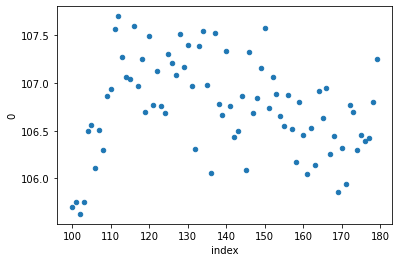

In [252]:
temp = pd.Series()
for x in range (100,180,1):
    val = sum(get_rand_sample(all_playoff_games, 'PrevPTS', x, 'PTS', 1000))/1000
    temp.loc[x] = val
temp.to_frame().reset_index().plot.scatter(x='index',y=0)
plt.show()

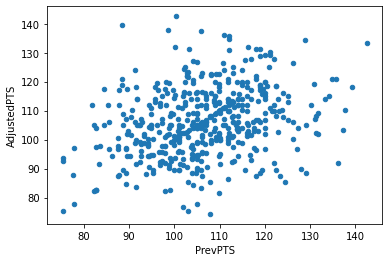

In [224]:
all_playoff_games.plot.scatter(x='PrevPTS', y='AdjustedPTS')

In [273]:
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
def get_weight(x, col_value, range_val):
    return 1/(00.1+abs((x-col_value)/range_val))
def get_rand_sample(df, col_name, col_value, sample_col_name, N, range_val):
    weights = df[col_name].apply(lambda x: get_weight(x,col_value, range_val))
    to_return = random.choices(population=list(df[sample_col_name]), 
                               weights=weights,
                               k=N)
    return to_return

In [274]:
all_playoff_games = pd.concat(playoff_df)
offense_cols = ['PlayoffMins','Age','SeriesGP','MissingMins','PointsPG','OppPointsPGOpponent','PrevPTS']
defense_cols = ['PlayoffMins','Age','SeriesGP','MissingMins','OppPointsPG','PointsPGOpponent','PrevOPTS']

In [276]:
def get_predictions(playoff_games, cols, predictor, N, model = None):
    predictions = all_playoff_games[['GameID','GameDate', 'MATCHUP'] + [predictor]]
    col_sum = []
    for x in cols:
        col_sum.append(x + "Sum")
    for col in cols:
        predictions[col] = playoff_games.apply(lambda x: get_rand_sample(playoff_games,col,x[col],predictor,N,playoff_games[col].max()-playoff_games[col].min()), axis = 1)
    for col in range(len(cols)):
        predictions[col_sum[col]] = predictions[cols[col]].apply(lambda x: sum(x)/N)
    X = predictions[col_sum]
    y = predictions[predictor]
    
    if(not model):
        model = LinearRegression().fit(X,y)
    
    coefs = pd.Series(model.coef_, index = col_sum).abs()
    predictions[predictor + 'Combined'] = predictions[cols].apply(lambda x: (np.array(x.values.tolist()) * coefs.values[:, None]).sum(axis=0)/coefs.sum(), axis = 1)
    predictions[predictor + 'LinearRegression'] = model.predict(X)
    ICD.display(predictions)
    return predictions[[predictor + 'Combined', predictor + 'LinearRegression']], model
        

In [277]:
pts_df, pts_model = get_predictions(all_playoff_games, offense_cols, 'AdjustedPTS', 1000)
opts_df, opts_model = get_predictions(all_playoff_games, defense_cols, 'AdjustedOPTS', 1000)
final = pd.concat([all_playoff_games, pts_df, opts_df], axis = 1)
final['WinProba'] = final.apply(lambda x: np.count_nonzero(x['AdjustedPTSCombined'] > x['AdjustedOPTSCombined'])/1000, axis = 1)
final['WinProbaScaled'] = final.apply(lambda x: x['WinProba']* 1/final[final['GameID'] == x['GameID']]['WinProba'].sum(), axis = 1)
final['WinProba2x'] = final.apply(lambda x: max(0,min(1,2*x['WinProbaScaled']-0.5)), axis = 1)


,GameID,GameDate,MATCHUP,AdjustedPTS,PlayoffMins,Age,SeriesGP,MissingMins,PointsPG,OppPointsPGOpponent,PrevPTS,PlayoffMinsSum,AgeSum,SeriesGPSum,MissingMinsSum,PointsPGSum,OppPointsPGOpponentSum,PrevPTSSum,AdjustedPTSCombined,AdjustedPTSLinearRegression
0,0041600151,2017-04-15,SAS vs. MEM,110.050671,"[102.04169565088483, 128.80291382665393, 89.59...","[91.56183770736541, 93.71696085723977, 131.238...","[108.93974620166576, 106.82214399192631, 113.9...","[121.06509652418315, 120.93708702807966, 99.70...","[82.29014110793351, 90.54448395506135, 109.816...","[119.96514547060187, 104.01552798440896, 101.9...","[113.98325297026139, 105.80479023962225, 109.8...",107.855095,106.679868,106.480873,107.161092,105.206123,105.346167,106.388863,"[108.55233896617715, 106.6507731683672, 106.76...",107.634769
1,0041600151,2017-04-15,MEM @ SAS,82.713511,"[84.44825044278748, 102.11909077249581, 120.93...","[89.77442048100234, 92.32343892222914, 104.904...","[111.04211812154884, 106.18866178075287, 110.1...","[101.27252003164395, 112.03356560477695, 91.56...","[101.87883672563187, 93.19606342344277, 101.73...","[111.75995237954054, 85.4781071555044, 83.4230...","[104.01552798440896, 121.06509652418315, 114.0...",104.396998,105.060213,106.665718,105.746193,103.897997,105.486747,104.222539,"[103.85107090521214, 101.15337566342191, 100.9...",96.505698
2,0041600171,2017-04-15,UTA @ LAC,97.844031,"[113.07126022950537, 84.44825044278748, 125.13...","[117.9874019786143, 91.21316845698654, 107.076...","[102.25574838146574, 106.90082401521269, 105.0...","[109.94844755538489, 113.98325297026139, 106.1...","[104.95717266948155, 100.9259578462582, 109.05...","[96.80653099539053, 107.07632818863638, 106.07...","[89.40796190363243, 102.11909077249581, 104.95...",104.992578,105.529421,106.575220,105.937555,103.208959,105.326264,105.246978,"[102.32308050446348, 103.47014156863737, 107.8...",97.648968
3,0041600171,2017-04-15,LAC vs. UTA,94.187511,"[93.29526459509471, 100.87013537191274, 122.90...","[118.0180583851379, 109.87420524883849, 102.25...","[97.3396066323568, 118.97063032843609, 104.015...","[109.87420524883849, 112.03356560477695, 97.33...","[139.37746406565623, 98.85273266447449, 101.12...","[94.74681756995669, 103.89623943307012, 104.10...","[92.57919145966947, 96.80653099539053, 99.8614...",106.218290,107.201759,105.515021,105.815672,105.278243,105.215698,104.776366,"[104.851330467954, 105.8671856918183, 103.5226...",99.927098
4,0041600111,2017-04-15,IND @ CLE,108.939746,"[106.90082401521269, 96.35637828253502, 122.05...","[105.91364214050837, 100.71802147810195, 102.2...","[109.16481154799357, 95.63125271658166, 108.93...","[87.49242269814917, 114.99195432398052, 102.04...","[127.30916314538965, 126.67237566418122, 114.0...","[96.80653099539053, 101.87883672563187, 99.861...","[131.13117598348657, 110.89155900114255, 119.5...",104.913923,106.529622,106.930607,106.106970,104.778400,106.360259,105.999891,"[108.73241481881908, 107.1701940286587, 108.82...",105.438173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0041800404,2019-06-07,GSW vs. TOR,90.457008,"[109.8163010338094, 104.95717266948155, 89.407...","[142.56811072415894, 101.735375230406, 142.568...","[91.56183770736541, 103.77008273501413, 93.196...","[111.96585026282314, 109.13834683021823, 126.3...","[104.90494078678925, 111.2245249734274, 106.18...","[108.13495483527664, 93.71696085723977, 104.78...","[115.97832776266286, 103.01352132375041, 88.56...",107.450673,107.178527,106.783113,105.123715,109.102720,105.534848,105.100353,"[108.86894343111788, 103.0366869705263, 104.61...",109.529507
160,0041800405,2019-06-10,TOR vs. GSW,103.238977,"[96.64860646888572, 113.94362025805474, 109.16...","[119.5345577624651, 110.12157518004001, 114.01...","[104.95717266948155, 104.10198573895204, 104.9...","[122.55294881331353, 116.99080302091753, 95.17...","[103.23897673128752, 120.50638343533066, 110.1...","[82.71351100496845, 127.30916314538965, 111.10...","[89.4

,GameID,GameDate,MATCHUP,AdjustedOPTS,PlayoffMins,Age,SeriesGP,MissingMins,OppPointsPG,PointsPGOpponent,PrevOPTS,PlayoffMinsSum,AgeSum,SeriesGPSum,MissingMinsSum,OppPointsPGSum,PointsPGOpponentSum,PrevOPTSSum,AdjustedOPTSCombined,AdjustedOPTSLinearRegression
0,0041600151,2017-04-15,SAS vs. MEM,82.713511,"[82.71351100496845, 102.11909077249581, 122.45...","[102.11909077249581, 101.87883672563187, 114.0...","[117.40366524972893, 92.57919145966947, 111.96...","[112.03356560477695, 104.95717266948155, 89.59...","[92.57919145966947, 90.22172097375842, 87.4924...","[107.07632818863638, 95.17895838989901, 93.295...","[112.03356560477695, 97.18256728655699, 97.844...",105.514573,105.556016,107.329834,106.670020,105.323273,103.321835,104.751480,"[105.2060923173594, 98.63301952177696, 102.374...",101.301515
1,0041600151,2017-04-15,MEM @ SAS,110.050671,"[131.82165922776582, 131.82165922776582, 93.80...","[114.05448857932716, 107.93104484794664, 95.17...","[89.40796190363243, 106.0752414098428, 94.3899...","[115.0079080544613, 111.1048035298618, 91.4402...","[102.04169565088483, 94.81792724959797, 106.07...","[105.04538469712588, 109.94844755538489, 120.0...","[77.6700042363728, 113.02501308800507, 107.076...",106.575765,106.591270,106.205213,104.916854,104.772259,104.723341,106.170224,"[106.27148834950681, 112.51657411602935, 100.3...",99.960752
2,0041600171,2017-04-15,UTA @ LAC,94.187511,"[91.56183770736541, 99.30606333200038, 106.188...","[118.97063032843609, 111.2245249734274, 111.96...","[119.95385867825787, 112.7317780524061, 113.02...","[89.40796190363243, 107.10509812255972, 104.90...","[92.68710414452285, 114.9609740103588, 98.8527...","[94.38992158289145, 99.30606333200038, 105.045...","[107.07632818863638, 88.56767729365517, 119.96...",106.212782,106.156302,107.220523,105.361634,105.406998,105.145584,104.449508,"[100.58817757531972, 103.90234710089135, 108.6...",101.615757
3,0041600171,2017-04-15,LAC vs. UTA,97.844031,"[94.38992158289145, 94.74681756995669, 109.948...","[98.15330083958335, 109.94844755538489, 97.339...","[103.11053825572392, 109.8163010338094, 107.17...","[130.87106778611113, 89.40796190363243, 89.407...","[122.55294881331353, 97.84403131075535, 104.22...","[89.40796190363243, 97.84403131075535, 89.4079...","[116.37380853701201, 116.02094527897073, 91.21...",104.947698,105.510400,106.925830,105.253077,105.447750,103.388911,104.943019,"[108.09411726559827, 100.70421187997187, 97.58...",96.093676
4,0041600111,2017-04-15,IND @ CLE,108.067776,"[93.19606342344277, 119.95385867825787, 104.78...","[96.64860646888572, 110.12157518004001, 111.75...","[109.05922315509261, 97.66596022118978, 116.37...","[101.735375230406, 92.57919145966947, 92.68710...","[86.25593104084597, 104.01552798440896, 101.73...","[119.02675973885704, 113.94362025805474, 112.0...","[104.78743648731819, 101.06986997801927, 105.0...",106.185111,106.159644,106.152515,105.165392,105.775974,106.648350,106.132341,"[103.48897990244411, 104.82321488347384, 105.6...",104.721786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0041800404,2019-06-07,GSW vs. TOR,106.822144,"[113.28423839886125, 93.71696085723977, 116.99...","[130.12247462976742, 84.54883353930458, 108.13...","[119.95385867825787, 97.18256728655699, 123.93...","[102.11909077249581, 116.99080302091753, 103.9...","[121.04416244629529, 116.00065567769965, 125.1...","[101.06986997801927, 112.03356560477695, 104.9...","[110.89155900114255, 130.12247462976742, 81.70...",106.353741,106.245328,106.790466,105.890647,107.132857,107.424192,107.512912,"[111.35238561083348, 107.87522545519252, 108.4...",112.818550
160,0041800405,2019-06-10,TOR vs. GSW,107.839498,"[123.09980402879127, 113.98325297026139, 113.0...","[109.8163010338094, 116.99080302091753, 107.17...","[85.26448355761785, 107.10509812255972, 76.774...","[113.94362025805474, 83.5744097348518, 87.5073...","[96.80653099539053, 113.94362025805474, 100.09...","[100.71802147810195, 118.97063032843609, 89.40..."

In [278]:
### print('AdjustedPTS', final['AdjustedPTS'].var())
print('AdjustedOPTS', final['AdjustedOPTS'].var())

print('AdjustedPTSLinearRegression', final['AdjustedPTSLinearRegression'].var())
print('AdjustedOPTSLinearRegression', final['AdjustedOPTSLinearRegression'].var())



AdjustedOPTS 143.09778282043828
AdjustedPTSLinearRegression 31.95473636372598
AdjustedOPTSLinearRegression 28.612049385401725


In [33]:
print('AdjustedPTS', final['AdjustedPTS'].var())
print('AdjustedOPTS', final['AdjustedOPTS'].var())

print('AdjustedPTSLinearRegression', final['AdjustedPTSLinearRegression'].var())
print('AdjustedOPTSLinearRegression', final['AdjustedOPTSLinearRegression'].var())


AdjustedPTS 143.09778282043828
AdjustedOPTS 143.09778282043828
AdjustedPTSLinearRegression 45.08579884871418
AdjustedOPTSLinearRegression 44.896808261654016


In [239]:
import pickle
pickle.dump( pts_model, open( "pts_model", "wb" ) )
pickle.dump( opts_model, open( "opts_model", "wb" ) )

In [240]:
def get_accuracy(left, right, df):
    curr_df = df[df['WinProba2x'].between(left,right, inclusive=True)]
    curr_df = (curr_df['AdjustedPTS'] > curr_df['AdjustedOPTS']).value_counts()
    if(True in curr_df):
        return curr_df[True]/curr_df.sum()
    if(False in curr_df):
        return 0
    return 1
accuracy_df = pd.DataFrame(columns=['left','right'])
for x in range(0,20):
    accuracy_df.loc[len(accuracy_df)] = [x/20, (x+1)/20]
accuracy_df['Accuracy'] = accuracy_df.apply(lambda x: get_accuracy(x['left'],x['right'],final), axis = 1)
accuracy_df

,left,right,Accuracy
0,0.00,0.05,1.000000
1,0.05,0.10,1.000000
2,0.10,0.15,1.000000
3,0.15,0.20,1.000000
4,0.20,0.25,1.000000
5,0.25,0.30,1.000000
6,0.30,0.35,0.000000
7,0.35,0.40,0.071429
8,0.40,0.45,0.252747
9,0.45,0.50,0.467626


In [241]:
all_playoff_games.to_csv('all_playoff_games.csv', index = False)

In [ ]:
player_dfs = []
grouped = leaguedashplayerstats.LeagueDashPlayerStats(season='2019-20', season_type_all_star='Regular Season').get_data_frames()[0].groupby('TEAM_ID')

for group in list(grouped.groups):
    curr_group = grouped.get_group(group)
    player_dfs.append(curr_group.sort_values('MIN', ascending=False).head(8))
player_df = pd.concat(player_dfs)


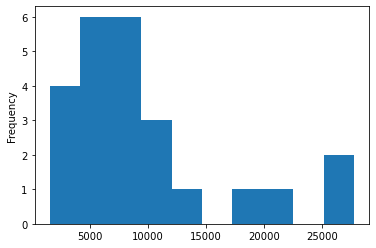

In [94]:
all_playoff_games.drop_duplicates('TeamID')['PlayoffMins'].plot.hist()

In [99]:
all_playoff_games

,GameID,GameDate,TeamID,OpponentTeamID,MATCHUP,PTS,OPTS,PointsPG,OppPointsPG,PointsPGOpponent,OppPointsPGOpponent,FG_PCT,PlusMinusClutch,Age,PlayoffMins,AdjustedPTS,AdjustedOPTS,PrevPTS,PrevOPTS,SeriesGP,MissingMins
0,0041600151,2017-04-15,1610612759,1610612763,SAS vs. MEM,111,82,105.3,98.1,100.5,100.0,0.429,100.0,29.133333,26118.571667,110.050671,82.713511,110.050671,82.713511,1,0.968826
1,0041600151,2017-04-15,1610612763,1610612759,MEM @ SAS,82,111,100.5,100.0,105.3,98.1,0.421,44.0,27.000000,9402.975000,82.713511,110.050671,82.713511,110.050671,1,0.829182
2,0041600171,2017-04-15,1610612762,1610612746,UTA @ LAC,97,95,100.7,96.8,108.7,104.4,0.489,41.0,26.857143,9866.133333,97.844031,94.187511,97.844031,94.187511,1,0.825989
3,0041600171,2017-04-15,1610612746,1610612762,LAC vs. UTA,95,97,108.7,104.4,100.7,96.8,0.403,23.0,31.166667,19430.856667,94.187511,97.844031,94.187511,97.844031,1,0.808528
4,0041600111,2017-04-15,1610612754,1610612739,IND @ CLE,108,109,105.1,105.3,110.3,107.2,0.414,-18.0,27.545455,9448.808333,108.939746,108.067776,108.939746,108.067776,1,0.823681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0041800404,2019-06-07,1610612744,1610612761,GSW vs. TOR,92,105,117.7,111.2,114.4,108.4,0.433,14.0,28.400000,24552.865000,90.457008,106.822144,107.171890,125.134512,4,0.708987
160,0041800405,2019-06-10,1610612761,1610612744,TOR vs. GSW,105,106,114.4,108.4,117.7,111.2,0.432,41.0,28.214286,14867.390000,103.238977,107.839498,106.822144,90.457008,5,0.749780
161,0041800405,2019-06-10,1610612744,1610612761,GSW @ TOR,106,105,117.7,111.2,114.4,108.4,0.433,14.0,28.400000,24552.865000,107.839498,103.238977,90.457008,106.822144,5,0.885196
162,0041800406,2019-06-13,1610612744,1610612761,GSW vs. TOR,110,114,117.7,111.2,114.4,108.4,0.433,14.0,28.400000,24552.865000,108.155118,115.978328,107.839498,103.238977,6,0.770485


In [242]:
pd.Series(pts_model.coef_, index=offense_cols)

PlayoffMins            1.644028
Age                    0.027868
SeriesGP               1.534583
MissingMins            1.776513
PointsPG               3.515841
OppPointsPGOpponent    0.241669
PrevPTS                1.922103
dtype: float64